In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train_and_test2.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/titanic/train_and_test2.csv")

In [4]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [5]:
df = df[['Age','Fare', '2urvived']]
df

,Age,Fare,2urvived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
1304,28.0,8.0500,0
1305,39.0,108.9000,0
1306,38.5,7.2500,0
1307,28.0,8.0500,0


In [6]:
df = df[:10]
df

,Age,Fare,2urvived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
5,28.0,8.4583,0
6,54.0,51.8625,0
7,2.0,21.0750,0
8,27.0,11.1333,1
9,14.0,30.0708,1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Fare'>

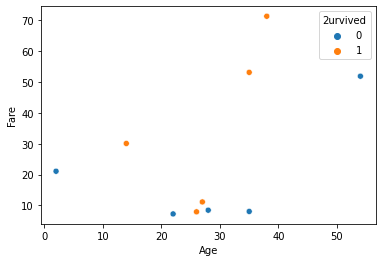

In [7]:
sns.scatterplot(df['Age'],df['Fare'],hue=df['2urvived'])

In [8]:
X = df.iloc[:,:2]
Y = df.iloc[:,-1]

In [9]:
Y

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: 2urvived, dtype: int64

In [10]:
p = Perceptron()

In [11]:
p.fit(X,Y)

Perceptron()

In [12]:
p.coef_

array([[-27.    ,  34.3914]])

## coef_ shows the weights assigned to each input branch of perceptron

In [13]:
p.intercept_

array([0.])

## intercept_ represents the bias

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"


<AxesSubplot:>

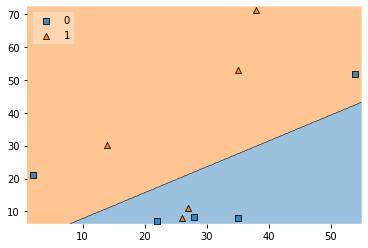

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, Y.values, clf = p, legend=2)